In [1]:
from PIL import Image
import numpy as np

Lillis-Gray.jpg JPEG 400 x 326 L


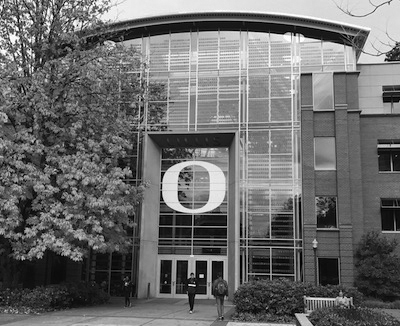

In [2]:
in_file = 'Lillis-Gray.jpg' #on canvas

image = Image.open(in_file)
image_width = image.size[0]
image_height = image.size[1]
print(in_file, image.format, image_width, 'x', image_height, image.mode)

image

Get images pixels into an np array

In [3]:
pix = np.array(image)
pix.shape

(326, 400)

In [4]:
#Draw a white line at row 200

row = 200
for col in range(image_width):
    pix[row, col] = 255
    
pix

array([[ 61,  41,  95, ..., 224, 219, 193],
       [105, 145, 122, ..., 215, 222, 225],
       [120, 221, 145, ..., 214, 217, 220],
       ...,
       [109, 109, 108, ...,  75,  66,  47],
       [104, 109, 117, ...,  60,  68,  57],
       [139, 146, 153, ...,  60,  60,  68]], dtype=uint8)

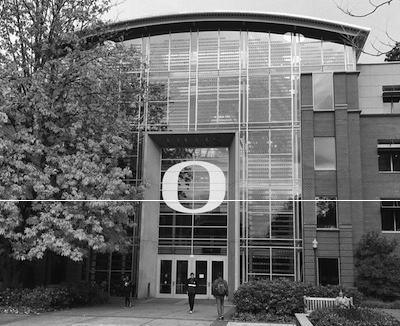

In [5]:
new_image = Image.fromarray(pix)
new_image

In [19]:
#Horizontal Edge
y_filter = np.array([1,2,1,0,0,0,-1,-2,-1])
y_filter = np.reshape(y_filter, (3,3))
y_filter.shape

(3, 3)

In [7]:
for row in range(3):
    for col in range(3):
        print(y_filter[row, col], ' ', end='')
        
    print()

1  2  1  
0  0  0  
-1  -2  -1  


In [20]:
#Vertical Edge
x_filter = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)])
x_filter.shape

(3, 3)

In [12]:
for row in range(3):
    for col in range(3):
        print(x_filter[row, col], ' ', end='')
        
    print()

-1  0  1  
-2  0  2  
-1  0  1  


Convolution function

In [1]:
def conv(my_image, im_row, im_col, x_filter, y_filter):
    '''
    Multiply pixels centered on a single pixel
    at image[im_row, im_col] by corresponding
    values in 3x3 x_filter or y_filter, then
    sums those values, returns square root
    of (xsum**2 + ysum**2)
    '''
    offset = 1    
    xsum = 0
    ysum = 0
    
    for row in range(3):
        image_row = im_row + row - offset
        for col in range(3):
            image_col = im_col + col - offset
            pixel = my_image[image_row, image_col]
            
            filter_value_x = x_filter[row, col]
            xsum += filter_value_x * pixel
            
            filter_value_y = y_filter[row, col]
            ysum += filter_value_y * pixel
        
    conv_pixel = np.sqrt(xsum**2 + ysum**2)
    return conv_pixel

Edgy

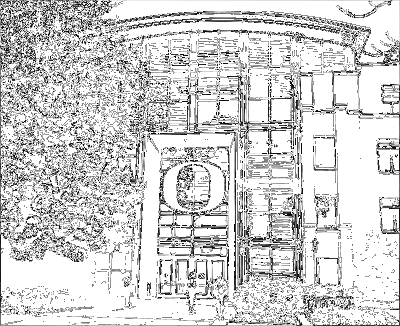

In [33]:
white = 255
black = 0
threshold = 115

pix = np.array(image)
new_image_array = np.array(image)

for a_row in range(1, image_height - 1):
    for a_col in range(1, image_width - 1):
        new_pixel = conv(pix, a_row, a_col, x_filter, y_filter)
        if new_pixel > threshold:
            new_pixdel = black
        else:
            new_pixel = white
        new_image_array[a_row, a_col] = new_pixel
        
new_image = Image.fromarray(new_image_array)
new_image